<a href="https://colab.research.google.com/github/Requenamar3/Machine-Learning/blob/main/MR2_Classif_Trees_Spring_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding Decision Trees in Machine Learning**

## **Introduction**
Decision trees are one of the simplest yet powerful algorithms used in machine learning for classification and regression tasks. This notebook is designed to help students understand decision trees by explaining concepts in an easy-to-follow manner, providing real-world examples, and thoroughly commenting on the code.

Imagine you are a **restaurant manager** analyzing customer spending behavior. You have historical data and want to predict if a customer will spend **more than $50** based on:
- Their **age**
- Whether they **ordered a dessert**
- The time of the **visit (weekday or weekend)**

A **decision tree** can use past customer data to identify patterns and help predict future spending!

--

---

##  Importing Necessary Libraries
Before we start, let's import the necessary Python libraries:

In [ ]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization

# Importing necessary modules from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV, KFold  # For model selection and tuning
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve  # For model evaluation
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier for building the decision tree model
from sklearn import tree  # Importing tree module for visualization and analysi

### **What This Notebook Covers**
- This notebook uses a small, simple dataset (a **toy dataset**) to explain **how a classification tree decides where to split the data**.
- It focuses on **splitting** based on a **numerical (quantitative) feature**—in this case, **Income**.

### **How the Splitting Works**
- A **decision tree** needs to decide where to split the data.
- This example looks at **how well different split points perform** by checking the **error rate** (how often the tree makes mistakes).
- But **Scikit-Learn's Decision Tree algorithm (CART) does not use error rate to make splits**.
  - Instead, it uses either **Gini index** or **Entropy** to decide the best split. These methods measure how "pure" each split is.

### **About the Dataset**
- The dataset has **three predictor variables** (features).
- The goal is to predict **Credit_Risk**, which is the **target variable** (what we're trying to classify).

__Creating the toy dataset__

There are three predictors. The outcome variable is Credit_Risk.

---

### 📌 **Creating the Toy Dataframe**  

In [ ]:
# Create a toy DataFrame for classification tasks
toy_df_classif = pd.DataFrame({
    'Savings': ['Med', 'Low', 'High', 'Med', 'Low', 'High', 'Low', 'Med'],  # Savings category
    'Assets': ['High', 'Low', 'Med', 'Med', 'Med', 'High', 'Low', 'Med'],   # Asset category
    'Income': [75, 50, 25, 50, 100, 25, 25, 75],  # Numeric income values
    'Credit_Risk': ['Good', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Good']  # Classification label
})

# Display the created DataFrame
toy_df_classif


,Savings,Assets,Income,Credit_Risk
0,Med,High,75,Good
1,Low,Low,50,Bad
2,High,Med,25,Bad
3,Med,Med,50,Good
4,Low,Med,100,Good
5,High,High,25,Good
6,Low,Low,25,Bad
7,Med,Med,75,Good


📌 **Why do we do this?**  
- A **toy dataset** is created to represent financial data.  
- It includes **three predictor variables** (`Savings`, `Assets`, `Income`).  
- The **target variable** (`Credit_Risk`) indicates whether a person is a "Good" or "Bad" credit risk.  
- This is a **classification problem** because the target (`Credit_Risk`) is categorical ("Good" or "Bad").  

✅ **Real-Life Example:**  
Think of this dataset as a **bank trying to decide whether to approve a loan** based on a person's financial information.

---

---

### **Finding the Best Places to Split Income in a Decision Tree**
- Before making any splits in the **Income** variable, we need to figure out **where** we can split the data.
- These possible split points are called **cutoff points**.

### **How We Find Cutoff Points**
- First, we **collect all unique Income values** (removing duplicates).
- We store these values in a list or array called **Income_unique**.
- These unique values will be tested to see which one gives the best split.

---

---

### 📌 **Understanding the Unique Values of Income**  

In [ ]:
# Extract the unique values from the 'Income' column in toy_df_classif
# and sort them in ascending order
Income_unique = np.sort(toy_df_classif['Income'].unique())

# Display the sorted unique income values
Income_unique


array([ 25,  50,  75, 100])


📌 **Why do we do this?**  
- Extracts all unique values of the `Income` column.  
- The values are **sorted** to help decide possible data splits.  

✅ **Real-Life Example:**  
Imagine you're a teacher grading students. Before deciding passing vs. failing, you **sort their scores** to see possible cutoff points.

---

---

### 📌 **Finding Cut Points for Splitting Data**  


In [ ]:
# Initialize an empty list to store cutpoints
cutpoints = []

# Loop through the sorted unique income values (excluding the last index)
for i in np.arange(len(Income_unique)-1):
    # Compute the midpoint between consecutive income values
    cutpoints.append((Income_unique[i] + Income_unique[i+1]) / 2)

# Display the calculated cutpoints
cutpoints


[37.5, 62.5, 87.5]

---

📌 **Why do we do this?**  
- **Decision trees split data based on thresholds.**  
- Midpoints between consecutive `Income` values are calculated to find **possible cut-off points** for classification.  
- These **cutpoints** act as decision boundaries for splitting data.  

✅ **Real-Life Example:**  
Think about a **restaurant menu**. If you have dishes priced at `$5, $10, and $15`, then logical price cutoffs would be `$7.50 and $12.50` to decide which price category a dish belongs to.

---


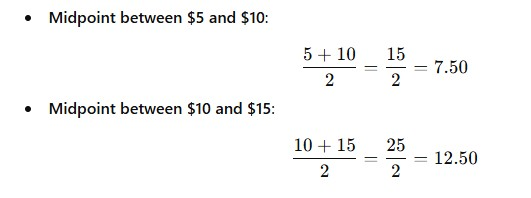

The algorithm will find an split using Income based on these three cutpoints and would decide the best split (i.e., the split
leading to the purest child nodes).

The next code cells will show in details (step by step) how __to obtain and evaluate ONLY the split done at 37.5.__ Later on, you will see a loop where all three cutoff points are evaluated.

__Reminder__: The algorithm would also do all the possible splits for the other two predictors, Savings and Assets, and would actually choose the best split obtained across all three predictors and across all cutoffs tested for each predictor.

---

### **How the Decision Tree Chooses the Best Split**
- The algorithm tests different **cutoff points** (split points) for **Income**.
- It picks the split that makes the **child nodes as "pure" as possible** (meaning each group contains mostly one class).

### **What’s Happening in the Next Code Cells**
- The code will first **focus on one specific split at 37.5** and analyze how good it is.
- Later, the code will **test all three cutoff points** in a loop to find the best one.

### **Reminder About Other Predictors**
- The algorithm will **not just split on Income**.
- It will also check **Savings** and **Assets**, testing different cutoff points for them.
- In the end, it picks **the best split among all three predictors**.

---

---

### 📌 **Splitting Data at Cutpoint 37.5**  


To illustrate, we evaluate a possible split at `Income = 37.5`.

#### **Left Node: People with Income ≤ 37.5**  

In [ ]:
# Filter rows where 'Income' is ≤ 37.5
toy_df_classif.loc[toy_df_classif['Income'] <= 37.5, ]


,Savings,Assets,Income,Credit_Risk
2,High,Med,25,Bad
5,High,High,25,Good
6,Low,Low,25,Bad


- Filters the dataset to include only people with `Income` **less than or equal to 37.5**.

Prediction for the left node: The most common class is "Bad".

#### **Right Node: People with Income > 37.5**  

In [ ]:
# RIGHT NODE FOR CUTPOINT 37.5

# Filter rows where 'Income' is > 37.5
toy_df_classif.loc[toy_df_classif['Income'] > 37.5, ]


,Savings,Assets,Income,Credit_Risk
0,Med,High,75,Good
1,Low,Low,50,Bad
3,Med,Med,50,Good
4,Low,Med,100,Good
7,Med,Med,75,Good


Prediction for the right node: The most common class is "Good".

The algorithm checks which split leads to a better separation of the classes by computing an error rate.

- Filters the dataset to include only people with `Income` **greater than 37.5**.  

📌 **Why do we do this?**  
- Decision trees **split the data** at specific points to create branches (nodes).  
- These splits help **classify** new data points into "Good" or "Bad" credit risk categories.  

✅ **Real-Life Example:**  
Imagine a **traffic light system**:  
- People with **income ≤ 37.5** go to **one lane** (Left Node).  
- People with **income > 37.5** go to **another lane** (Right Node).  

This is how a **decision tree classifies data step by step**.

---


__What's the prediction of Y for the left node?__

Answer: The prediction is Bad because it is the most common class in this node. The next two code cells show you how to get this label programmatically.

---

### 📌 **Counting "Good" and "Bad" Credit Risks in Left Node**

In [ ]:
# Filter rows where 'Income' is ≤ 37.5
# Count occurrences of each 'Credit_Risk' value
toy_df_classif.loc[toy_df_classif['Income'] <= 37.5, ]['Credit_Risk'].value_counts()


,count
Credit_Risk,
Bad,2
Good,1


- Counts the number of **"Good" and "Bad"** credit risks in the **Left Node** (Income ≤ 37.5).  


#### **Choosing the Majority Class**  

In [ ]:
# Filter rows where 'Income' is ≤ 37.5
# Count occurrences of each 'Credit_Risk' value
# Get the most frequent 'Credit_Risk' value
toy_df_classif.loc[toy_df_classif['Income'] <= 37.5, ]['Credit_Risk'].value_counts().idxmax()


'Bad'

- **Finds the most common label ("Good" or "Bad")** in this group.  

📌 **Why do we do this?**  
- The **majority class** becomes the label for that branch of the tree.  
- If `Income ≤ 37.5` mostly leads to "Bad" credit risk, we classify future applicants accordingly.  

✅ **Real-Life Example:**  
Think of **weather prediction**:  
- If it's **cloudy** 8 out of 10 times before it rains, you’d classify **cloudy = likely to rain**.

---


__What's the error rate at the left node?__

Error rate for left node = 1/3 (proportion for the least frequent class in this node, which is Good)

### 📌 **Calculating Error and Evaluating the Split**  

After splitting the data at **Income ≤ 37.5**, the next step is to measure how "good" this split is. The goal is to minimize errors in classification.  

---

### 📌 **Measuring Error in the Left Node**  

In [ ]:
# Filter rows where 'Income' is ≤ 37.5
# Get the proportion of each 'Credit_Risk' value
# Find the smallest proportion (error rate for the minority class)
error_left = toy_df_classif.loc[toy_df_classif['Income'] <= 37.5, ]['Credit_Risk'].value_counts(normalize=True).min()

# Display the error rate
error_left


0.3333333333333333

📌 **Why do we do this?**  
- The `.value_counts(normalize=True).min()` calculates the **proportion of the minority class** in the left node.  
- If most values in the left node are "Good" and only a few are "Bad" (or vice versa), the **error** is the proportion of the minority class.  
- This represents the **misclassification error** for this part of the split.  

✅ **Real-Life Example:**  
Imagine sorting apples by size. If **90%** are "Large" and **10%** are "Small," then the error in your classification is **10%** since those small apples were incorrectly grouped.

---

__What's the prediction of Y for the right node?__



Answer: The prediction is Good because it is the most common class in this node.

---

### 📌 **Finding the Majority Class in the Right Node**  

In [ ]:
# Filter rows where 'Income' is > 37.5
# Count occurrences of each 'Credit_Risk' value
# Get the most common 'Credit_Risk' value
toy_df_classif.loc[toy_df_classif['Income'] > 37.5, ]['Credit_Risk'].value_counts().idxmax()


'Good'


📌 **Why do we do this?**  
- Finds the **most common class** in the **Right Node (Income > 37.5)**.  
- If "Good" is the most common, this means the right node will be labeled as "Good."  

✅ **Real-Life Example:**  
Think of a **fast-food drive-thru**:  
- If **most customers order burgers**, it makes sense to **prepare more burgers** than salads.  

---

__What's the error rate at the right node?__


Error rate for right node = 1/5= 0.2 (proportion of obs that belong to the least frequent class)

---

### 📌 **Measuring Error in the Right Node**  

In [ ]:
# Filter rows where 'Income' is > 37.5
# Get the proportion of each 'Credit_Risk' value
# Find the smallest proportion (error rate for the minority class)
error_right = toy_df_classif.loc[toy_df_classif['Income'] > 37.5, ]['Credit_Risk'].value_counts(normalize=True).min()

# Display the error rate
error_right


0.2

📌 **Why do we do this?**  
- Just like in the left node, this finds the **misclassification error** for the right node.  
- The error is the proportion of the **minority class** in the right node.  

✅ **Real-Life Example:**  
Imagine a **movie theater** where 80% of people watch action movies and 20% watch romance.  
- If you only promote **action movies**, you are **misclassifying 20%** of your audience.  

---

__What's the error associated with making a split at 37.5 based on Income?__

Combine the error rate from both the left and right node!

How can we combine these errors? We need to obtain the weighted average of the errors for the left and right nodes.

__Error for split at 37.5= weight for left node * error rate for left node + weight for right node * error rate for right node__

weight for left node= obs that reached the left node/ obs before the split

weight for right node= obs that reached the right node/ obs before the split

__Curiosity:__ Notice that the unweighted average (which we do not need to compute), we will be obtained:

Unweighted average = (error rate for left node + error rate for right node)/ 2 = 0.5 * error rate for left node + 0.5 * error rate for right node

---

### **How Do We Measure the Error for a Split at 37.5?**
- When we **split** at **Income = 37.5**, we create **two groups** (left and right nodes).
- Each group will have some classification mistakes (errors).
- To find the total error, we **combine** the errors from both sides.

### **How Do We Calculate the Total Error?**
We use a **weighted average** of the errors:


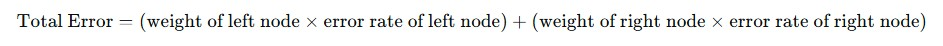

### **What Are the Weights?**
- **Weight for left node** = (number of observations in the left node) ÷ (total number of observations before the split).
- **Weight for right node** = (number of observations in the right node) ÷ (total number of observations before the split).

### **Key Idea**
- Instead of just averaging the errors equally, we give **more importance (weight)** to the larger group.
- If one side has more data, its error has a bigger impact on the total.

### **Extra Note (Curiosity)**
- If we used a simple average (without weights), we’d just take:

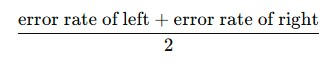


- But this does **not** properly account for different group sizes.

---


### 📌 **Finding the Size of Each Node**  

In [ ]:
# Count the number of rows where 'Income' is ≤ 37.5
left_node_size = len(toy_df_classif.loc[toy_df_classif['Income'] <= 37.5, ])

# Display the size of the left node
left_node_size


3

In [ ]:
# Count the number of rows where 'Income' is > 37.5
right_node_size = len(toy_df_classif.loc[toy_df_classif['Income'] > 37.5, ])

# Display the size of the right node
right_node_size


5

📌 **Why do we do this?**  
- Calculates the **number of observations** in each node.  
- This helps to **weight the errors** when calculating the overall error for the split.  

✅ **Real-Life Example:**  
If you run a **poll** with 1,000 people but only 200 from one group, their opinions should be weighted less than the majority group.

---


### 📌 **Calculating the Weighted Error for the Split**  

### 📌 **Evaluating Split Errors Before and After Splitting**
Now, the goal is to **compare how good a split is** by calculating errors before and after splitting at different cutpoints.

---

In [ ]:
# Compute weighted error for the split
weighted_error = error_left * (left_node_size / (left_node_size + right_node_size)) + \
                 error_right * (right_node_size / (left_node_size + right_node_size))

# Show result
weighted_error


0.25

Is the split benefitial? Is the error after the split lower than the error before split?

📌 **Why do we do this?**  
- This formula calculates the **overall misclassification error** for the split.  
- The error from each node is **weighted** based on how many data points are in each group.  
- A good split will have a **low weighted error**, meaning it **separates the classes well**.  

✅ **Real-Life Example:**  
Imagine grading two classes:  
- **Class A** has 5 students, and **Class B** has 50.  
- If 2 students in Class A fail (40%) and 10 in Class B fail (20%), the overall failure rate **isn't just the average**; it must be **weighted by class size**.  

---

---

### 📌 **Calculating Error Before the Split**


In [ ]:
# Get the proportion of each 'Credit_Risk' value
# Find the smallest proportion (error rate for the minority class)
toy_df_classif['Credit_Risk'].value_counts(normalize=True).min()


0.375

📌 **Why do we do this?**  
- This finds the **misclassification error before splitting** the data.  
- The error is the proportion of the minority class in the whole dataset.  

✅ **Real-Life Example:**  
Imagine a **school test** where 3 out of 8 students fail.  
- If you had to **guess a single label for all students**, you'd choose "Pass" (majority class).  
- But your overall **error rate is 3/8 = 37.5%** since those 3 students were misclassified.

---

### 📌 **Manually Checking the Initial Error Rate**

In [ ]:
3/8

0.375

📌 **Why do we do this?**  
- Confirms that the error calculation matches expectations.

✅ **Real-Life Example:**  
If 3 out of 8 students failed, and you predicted all would pass, your **error rate is 3/8**.

---

Doing an split at 37.5 is benefitial because the error rate after the split is lower than the error rate before the split.

The previous code cells included the steps to compute the weighted error rate for the split at 37.5 on Income.

The next loop summarizes the computation of the weighted error for the three splits on Income, that is the splits at 37.5, 62.5, and 87.5.

We can get what's the best of all the splits for Income based on the output of this loop.


### **Why Is Splitting at 37.5 a Good Idea?**
- The **split at 37.5** is **helpful** because after the split, the **error rate decreases**. This means the model gets better at predicting after splitting the data at this point.

### **What Was Done in the Previous Code Cells?**
- The previous code showed **how to compute the error** after the split at 37.5.

### **What Happens Next?**
- In the next part of the code, the algorithm will **repeat** the error calculation for **three different split points** on Income:
  - **37.5**
  - **62.5**
  - **87.5**

### **How Do We Find the Best Split for Income?**
- The code will compare the **errors** for all three splits and decide which one is the **best** for splitting Income.

---

### 📌 **Looping Through All Possible Cut Points**

In [ ]:
# Initialize a list to store error rates for different split points
error_rate_splits = []

# Iterate through each cutpoint (split threshold)
for i in cutpoints:
    # Calculate the size of the left and right nodes
    left_node_size = len(toy_df_classif.loc[toy_df_classif['Income'] <= i, ])
    right_node_size = len(toy_df_classif.loc[toy_df_classif['Income'] > i, ])

    # Compute error rate for the left and right nodes
    error_left = toy_df_classif['Credit_Risk'][toy_df_classif['Income'] <= i].value_counts(normalize=True).min()
    error_right = toy_df_classif['Credit_Risk'][toy_df_classif['Income'] > i].value_counts(normalize=True).min()

    # Compute the weighted error and store in the list
    error_rate_splits.append(
        error_left * (left_node_size / (left_node_size + right_node_size)) +
        error_right * (right_node_size / (left_node_size + right_node_size))
    )


📌 **Why do we do this?**  
- The loop goes through **each possible cutpoint** and calculates the **weighted error** for splitting at that point.  
- Each error rate is stored in `error_rate_splits`.  

✅ **Real-Life Example:**  
Imagine dividing a **group of students** based on grades.  
- If you split at **70%, 80%, or 90%**, you check which split **minimizes wrong classifications**.

---

---

### 📌 **Creating a DataFrame of Errors for Each Cutoff**

In [ ]:
# Create a DataFrame to store error rates with corresponding cutpoints as index
error_rate_splits_df = pd.DataFrame(data=error_rate_splits, index=cutpoints, columns=['Weighted_Error_Split'])

# Set index name as 'Cutoff_point'
error_rate_splits_df.index.name = 'Cutoff_point'

# Display the DataFrame
error_rate_splits_df


,Weighted_Error_Split
Cutoff_point,
37.5,0.250
62.5,0.625
87.5,0.500


📌 **Why do we do this?**  
- Stores **all split errors** in a table.  
- Helps find the **best cutpoint** by choosing the one with the lowest error.

✅ **Real-Life Example:**  
Think of **sorting apples by size**:  
- If you try different split points (`Small < 5cm`, `Medium < 7cm`), you compare which gives **the best separation**.

---

The best split and only meaningful split is the one at 37.5 because it leads to the lowest error rate (and the only error rate lower than the error rate at the parent node).

### **Choosing the Best Split**
- The **best and most meaningful split** is the one at **37.5**.
- This split is the **only one** that leads to a **lower error rate** than the error rate before the split.
- In other words, it improves the model's accuracy more than any other split.


---

### BACK TO THE SLIDES !

---

The example compares the **error rate**, **Gini index**, and **Entropy** to determine the best split in a classification tree. The goal is to understand how each method evaluates the "purity" of the splits.

---

### **Problem Setup**

- **Y has two classes (0 and 1)**.
- The node has **800 observations**, split evenly: **400 zeros (class 0)** and **400 ones (class 1)**.
- **Split 1**:
  - **Left node**: 300 zeros, 100 ones.
  - **Right node**: 100 zeros, 300 ones.
- **Split 2**:
  - **Left node**: 200 zeros, 400 ones.
  - **Right node**: 200 zeros, 0 ones (this node is **pure**—only one class).

---

### **Error Rate Calculation**

The **error rate** is calculated by the weighted average of errors in the left and right nodes.

**Formula**:


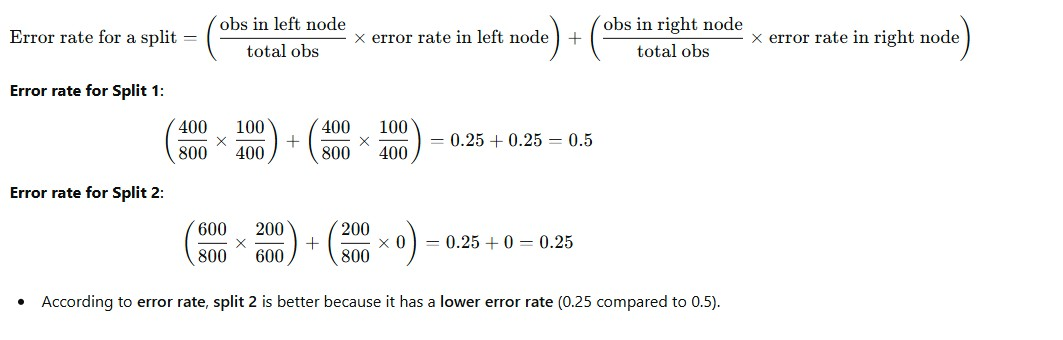

---

### **Gini Index Calculation**

The **Gini index** measures the impurity of the nodes. Lower values mean purer nodes (fewer mixed classes).

**Formula**:


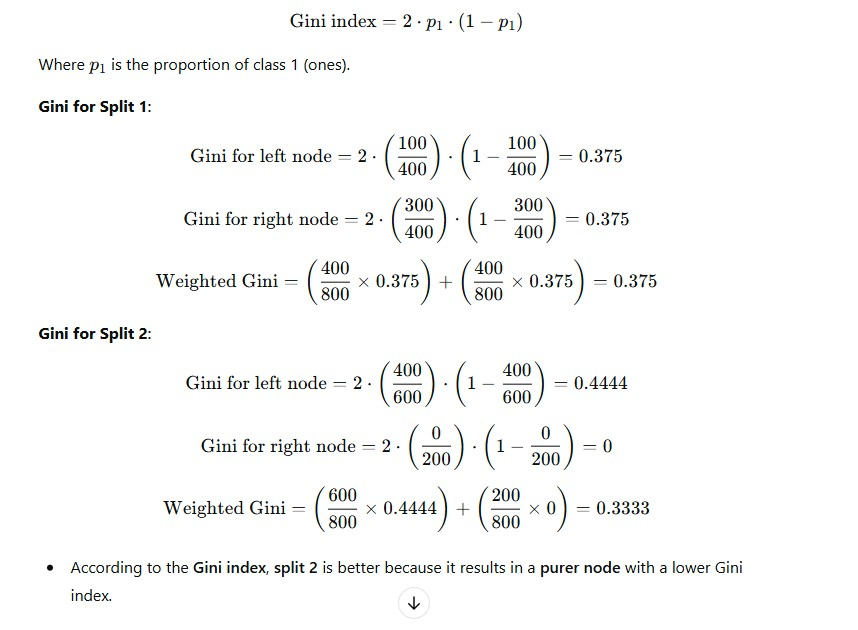

---

### **Entropy Calculation**

**Entropy** measures the unpredictability or disorder in the nodes. Lower entropy means more "purity."

**Formula**:

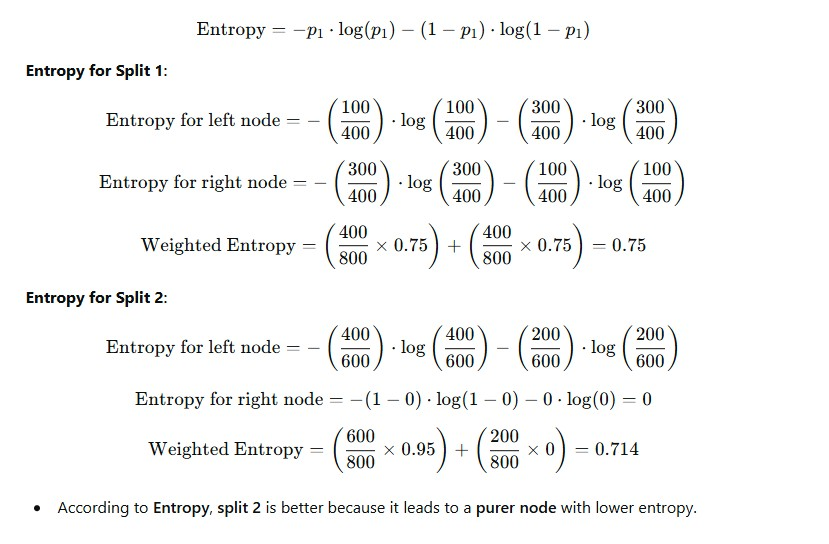

---

### **Conclusion:**

- **Error rate**: Split 2 is better (lower error rate).
- **Gini index**: Split 2 is better (lower Gini).
- **Entropy**: Split 2 is better (lower entropy).

**Key takeaway**: Gini and Entropy are **more sensitive** to **purity** (how many instances belong to one class). Both prefer **split 2** because it has a **pure node** (one class in the right node), while the error rate doesn’t account for this purity.

---

### Example comparing error rate, Gini, and Entropy.

### **YOU WILL EXPLORE THIS EXAMPLE INDEPENDENTLY !!!**

The following example will show that the Gini index and Entropy are more sensitive to changes in the node probabilities than the error rate.

- Y has two classes (0 and 1)
- The node under consideration contains 800 obs, 400 from each class.
- Split 1 leads to a left node with 300 zeros and 100 ones AND a right node with  100 zeros and 300 ones.
- Split 2 leads to a left node with 200 zeros and 400 ones AND a right node with  200 zeros and 0 ones.
- Compute the error rate, Gini, and Entropy for both splits.

Error rate split 1

Reminder: Error rate for a split=  Average weighted error

Average weighted error= Weight for left node * error rate for left node + weight for right node * error rate for right node

In [ ]:
(400/800)* (100/400) + (400/800)* (100/400)


0.25

Error rate split 2

In [ ]:
(600/800)* (200/600) + (200/800)* (0/200) # the right node for split 2 is completely pure!

0.25

According to the error rate, splits 1 and 2 are equally good.

Gini split 1

Gini index for a split= Weighted Gini for the split

Weighted Gini for the split= Weight for left node * Gini for left node + weight for right node * Gini for right node

G= 2 p1 (1-p1)

In [ ]:
(400/800)* (2*(100/400)*(300/400)) + (400/800)* (2*(300/400)*(100/400))

0.375

In [ ]:
# 1 - (100/400) = 300/400

Gini split 2

In [ ]:
(600/800)* (2*(400/600)*(200/600)) + (200/800)* (2*(0/200)*(200/200))

0.3333333333333333

According to Gini, split 2 is better. Gini heavily weighs the fact that split 2 gives us a perfectly pure node.

Entropy split 1

Entropy for a split= Weighted Entropy for the split

Weighted Entropy for the split= Weight for left node * Entropy for left node + weight for right node * Entropy for right node

D= - (1-p1) * log (1 -p1) - p1 * log(p1)

Reminder: p1 for the left node in split 1 is 100/400

Reminder: p1 for the right node in split 1 is 300/400

In [ ]:
(400/800)* (-(300/400)*np.log(300/400)- (100/400)*np.log(100/400)) + \
(400/800)* (-(100/400)*np.log(100/400) -(300/400)*np.log(300/400))

0.5623351446188083

Entropy split 2

D= - (1-p1) * log (1 -p1) - p1 * log(p1)

Reminder: p1 for the left node in split 2 is 400/600

Reminder: p1 for the right node in split 2 is 0

In [ ]:
(600/800)* ( -(200/600)*np.log(200/600) - (400/600)*np.log(400/600) ) + \
(200/800)* (- (1-0) * np.log (1 -0) - 0 * 0)

# Note: We are assuming that log (0) = 0. In reality, log (0) is not defined.

0.4773856262211096

According to the Entropy, split 2 is better. Similarly to Gini, Entropy heavily weighs the fact that split 2 gives us a perfectly pure node

---
---

# Example 1: **Obtaining a classification tree for the Default data set**

### 📌 **Building a Decision Tree with Hyperparameter Tuning**  

This code moves from manually splitting data to **automating the decision tree process** using `DecisionTreeClassifier` and **hyperparameter tuning**.

---

### 📌 **Loading the Dataset**  

In [ ]:
# Load dataset from an online source
url = 'https://raw.githubusercontent.com/Requenamar3/Machine-Learning/refs/heads/main/Default.csv'
default_df = pd.read_csv(url)

# Display basic dataset information
default_df.info()  # Column types and missing values
default_df.head()  # First few rows of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879



📌 **Why do we do this?**  
- Loads a dataset from an **online source** (GitHub).  
- This dataset is likely related to **loan defaults**, where the target variable (`default`) indicates whether a person **defaulted on a loan** (Yes/No).  

✅ **Real-Life Example:**  
Think of this dataset as **bank records** where the goal is to predict if a person will **default** on a loan based on financial information.

---


### 📌 **Checking Dataset Information**  

In [ ]:
# Convert categorical column 'student' into dummy variables
# Drop the first category to avoid multicollinearity
default_df_dummies = pd.get_dummies(default_df, columns=['student'], drop_first=True)

# Display information about the DataFrame, including column names, data types, and non-null counts
default_df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   default      10000 non-null  object 
 1   balance      10000 non-null  float64
 2   income       10000 non-null  float64
 3   student_Yes  10000 non-null  bool   
dtypes: bool(1), float64(2), object(1)
memory usage: 244.3+ KB


📌 **Why do we do this?**  
- `.info()` checks for **missing values** and **data types**.  
- `.head()` shows the **first few rows** to understand the structure of the data.  

✅ **Real-Life Example:**  
Before cooking, you **check the ingredients** to ensure nothing is missing and everything is in the right format.

---

---

### 📌 **Converting Categorical Variables to Numeric (One-Hot Encoding)**  

In [ ]:
# Separate features (X) and target variable (y)
X_def = default_df_dummies.drop('default', axis=1)  # Drop the target column to get feature variables
y_def = default_df_dummies['default']  # Select the target column

📌 **Why do we do this?**  
- **Separates predictors (X) from the target (y)**.  
- `X_def` contains financial details (`Income`, `Balance`, etc.).  
- `y_def` is the target variable (`default` = 0 or 1).  

✅ **Real-Life Example:**  
Think of a **job interview**:  
- Your **resume (X)** includes education, experience, and skills.  
- The **decision (y)** is whether you get hired (Yes/No).  

---


# Pre-pruning strategy using GridSearch.

Reminder: Pre-pruning means preventing the final tree to be too big by setting up several stopping criteria.


---

### 📌 **Splitting Data into Training and Testing Sets**  


In [ ]:
# Split data into training and testing sets (80% train, 20% test)
# Stratify ensures the target variable distribution is preserved in both sets
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(
    X_def, y_def, test_size=0.2, random_state=1, stratify=y_def
)

📌 **Why do we do this?**  
- `train_test_split` **splits data** into **80% training and 20% testing**.  
- `random_state=1` ensures the split is **reproducible**.  
- `stratify=y_def` ensures that both training and testing sets have the **same proportion** of "default" cases as the original dataset.  

✅ **Real-Life Example:**  
Imagine training a **chess AI**:  
- You train it on **80% of past games** and test it on **20% of new games** to evaluate performance.

---

---

### 📌 **Defining Hyperparameters for Grid Search**

In [ ]:
# Notice that we have an extra hyperparameter here when compared to regression trees: 'criterion'.
# Therefore, I am using fewer options for each hyperparameter in comparison with regression trees to minimize comp time.

# Define a hyperparameter grid for tuning a decision tree classifier
hyperparam_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': np.arange(2, 7),  # Tree depths from 2 to 6
    'min_samples_split': [0.05, 0.1, 0.15, 0.2],  # Min percentage of samples needed to split a node
    'min_samples_leaf': [0.05, 0.1, 0.15, 0.2],  # Min percentage of samples needed in a leaf node
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.01, 0.05]  # Minimum impurity decrease for a split
}


📌 **Why do we do this?**  
- **Hyperparameters** control how the tree is built.  
- `criterion`: Decision trees use **"gini" (Gini Index) or "entropy" (Information Gain)** to split nodes.  
- `max_depth`: Limits how **deep** the tree can grow (avoids overfitting).  
- `min_samples_split`: The **minimum % of data points** needed to create a split.  
- `min_samples_leaf`: The **minimum % of data points** needed in a leaf node.  
- `min_impurity_decrease`: A **threshold for stopping growth** if splitting doesn’t improve purity.  

✅ **Real-Life Example:**  
Think of **planting a tree**:  
- You decide **how deep the roots should go**, **how many leaves grow per branch**, and **when to stop growth**.

---

---

### 📌 **Setting Up Cross-Validation (K-Fold Method)**  

In [ ]:
# Set up cross-validation with 10 splits, shuffling the data for randomness
cv_set_up = KFold(n_splits=10, shuffle=True, random_state=1)


📌 **Why do we do this?**  
- **K-Fold Cross-Validation** splits the training data into **10 smaller sets** (folds).  
- The model is trained **10 times**, each time using a different fold as the validation set.  
- Helps ensure the model is **robust** and not biased toward a particular split.  

✅ **Real-Life Example:**  
Think of **studying for an exam**:  
- Instead of reading a book **once**, you break it into **10 sections** and review each one separately to test your knowledge.

---

---

### 📌 **Performing Grid Search for Hyperparameter Tuning**  

In [ ]:
# Initialize GridSearchCV for hyperparameter tuning using DecisionTreeClassifier
grid_search_setting_pre_pru = GridSearchCV(
    DecisionTreeClassifier(random_state=1),  # Base model
    param_grid=hyperparam_grid,  # Hyperparameter grid to search
    cv=cv_set_up,  # Cross-validation setup
    scoring='accuracy'  # Use accuracy as the evaluation metric
)

📌 **Why do we do this?**  
- `GridSearchCV` tries **every combination** of hyperparameters and selects the one with the **best accuracy**.  
- Uses **cross-validation (10-fold)** to make sure results are consistent.  

✅ **Real-Life Example:**  
Imagine **choosing the best phone**:  
- You test different **brands, screen sizes, camera quality, and battery life** before deciding.

---

---

### 📌 **Training the Model with Best Hyperparameters**  

In [ ]:
# Fit the grid search on the training data
grid_search_setting_pre_pru.fit(X_train_def, y_train_def)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6]),
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.01,
                                                   0.05],
                         'min_samples_leaf': [0.05, 0.1, 0.15, 0.2],
                         'min_samples_split': [0.05, 0.1, 0.15, 0.2]},
             scoring='accuracy')


📌 **Why do we do this?**  
- **Trains multiple models** with different hyperparameters.  
- Selects the **best model** based on accuracy.  

✅ **Real-Life Example:**  
Think of **baking cookies**:  
- You try different **oven temperatures, baking times, and ingredient ratios** to find the **perfect recipe**.

---

---

### 📌 **Getting the Best Hyperparameters**  

In [ ]:
# Print the best hyperparameters found
print('The best hyperparameters are:', grid_search_setting_pre_pru.best_params_)

The best hyperparameters are:  {'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05}


📌 **Why do we do this?**  
- Displays the **optimal settings** found by `GridSearchCV`.  

✅ **Real-Life Example:**  
Imagine testing **multiple job interview strategies**.  
- You find that **dressing professionally, making eye contact, and practicing common questions** work best.

---

---

### 📌 **Creating a Pruned Decision Tree with the Best Parameters**  

In [ ]:
# Create a DecisionTreeClassifier using the best found hyperparameters
tree_default_prepruned = DecisionTreeClassifier(
    criterion='gini',  # Best found splitting criterion
    max_depth=2,  # Best found max depth
    min_samples_split=0.05,  # Best found min samples required to split
    min_samples_leaf=0.05,  # Best found min samples required per leaf
    min_impurity_decrease=0,  # Best found min impurity decrease
    random_state=1  # Ensure reproducibility
)

📌 **Why do we do this?**  
- **Creates a decision tree** using the best hyperparameters from `GridSearchCV`.  
- **Pre-pruning** limits tree growth to **prevent overfitting**.  

✅ **Real-Life Example:**  
Imagine a **budget plan**:  
- Instead of spending money **without limits**, you set **maximum spending rules** to avoid financial trouble.

---

**Remember** that you can also retrieve the best solution by simply invoking the 'best_estimator_' attribute on the grid search object. Like this:

### 📌 **Using the Best Decision Tree Model from Grid Search**  

Instead of manually specifying hyperparameters, the best model found by `GridSearchCV` can be directly used.

---

### 📌 **Assigning the Best Model from Grid Search**


In [ ]:
# Retrieve the best decision tree model found by GridSearchCV
# tree_default_prepruned = grid_search_setting_pre_pru.best_estimator_



📌 **Why do we do this?**  
- `grid_search_setting_pre_pru.best_estimator_` automatically selects the best decision tree model from the grid search.  
- This ensures the model **has the optimal hyperparameters** found through cross-validation.  

✅ **Real-Life Example:**  
Imagine **buying a car**:  
- Instead of manually testing different models, you let a **professional reviewer** pick the best one for you.
---

### 📌 **Training and Visualizing the Decision Tree**

Now that the best hyperparameters have been found, the next step is to **train the decision tree, visualize it, and evaluate its predictions**.

---

### 📌 **Training the Decision Tree Model**

In [ ]:

# Train the decision tree on the training data
tree_default_prepruned.fit(X_train_def, y_train_def)

DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0,
                       min_samples_leaf=0.05, min_samples_split=0.05,
                       random_state=1)

📌 **Why do we do this?**  
- **Creates and trains the decision tree** using the optimal hyperparameters.  
- The tree is **pre-pruned** to prevent overfitting.  

✅ **Real-Life Example:**  
Think of training a **security guard**:  
- Instead of memorizing every criminal, they learn **rules** (e.g., "People wearing masks inside the bank are suspicious").  

---

---

### 📌 **Visualizing the Decision Tree**

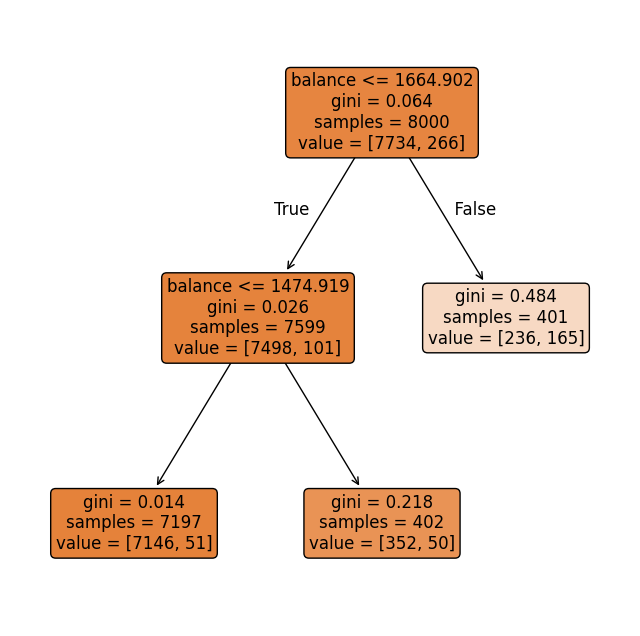

In [ ]:
# Plot the decision tree
plt.figure(figsize=(8, 8))  # Set figure size
tree.plot_tree(
    tree_default_prepruned,
    filled=True,  # Fill nodes with color
    rounded=True,  # Round node edges
    feature_names=X_train_def.columns,  # Label nodes with feature names
    fontsize=12  # Set font size for readability
)
plt.show()  # Display the tree

📌 **Why do we do this?**  
- Displays a **tree diagram** showing how the model makes decisions.  
- `filled=True` colors nodes based on their classification.  
- `feature_names=X_train_def.columns` labels the branches with feature names.  

✅ **Real-Life Example:**  
Think of a **flowchart** for diagnosing an illness:  
- **"Do you have a fever?" → "Yes" → "Do you have a cough?"**  
- The tree follows a **step-by-step decision-making process**.


---

### 📌 **Checking the Classes Predicted by the Model**

In [ ]:
# Get the class labels of the trained decision tree
tree_default_prepruned.classes_

array(['No', 'Yes'], dtype=object)

📌 **Why do we do this?**  
- Shows the **two possible output classes** (e.g., `default = Yes/No`).  

✅ **Real-Life Example:**  
Think of a **spam filter**:  
- The model classifies emails as **"Spam"** or **"Not Spam"**.  

---

---

### 📌 **Making Predictions on the Test Set**

In [ ]:
# Predict labels for the test set
y_pred_pre_tree_def = tree_default_prepruned.predict(X_test_def)

📌 **Why do we do this?**  
- Uses the trained model to **predict** whether each test case will default or not.  

✅ **Real-Life Example:**  
Think of a **weather app**:  
- After training on past weather data, the app **predicts** if it will rain tomorrow.  

---


### 📌 **Creating the Confusion Matrix**

In [ ]:
# Generate the confusion matrix to evaluate performance
confusion_matrix(y_test_def, y_pred_pre_tree_def)

array([[1933,    0],
       [  67,    0]])

📌 **Why do we do this?**  
- The **confusion matrix** evaluates how well the model performs.  
- It counts:
  - **True Positives (TP)**: Correctly predicted "Yes" (default).  
  - **True Negatives (TN)**: Correctly predicted "No" (no default).  
  - **False Positives (FP)**: Predicted "Yes" but the actual was "No" (False Alarm).  
  - **False Negatives (FN)**: Predicted "No" but the actual was "Yes" (Missed Default).  

✅ **Real-Life Example:**  
Think of a **fire alarm system**:  
- **TP:** Alarm rings when there’s fire.  
- **TN:** No alarm when there's no fire.  
- **FP:** False alarm when there’s no fire.  
- **FN:** No alarm when there is a fire (dangerous!).  

---

Without obtaining the classification report, tell me the specificity and sensitivity of this classifier.

---

### 📌 **Displaying the Confusion Matrix as a DataFrame**

In [ ]:
# Convert the confusion matrix into a DataFrame for better readability
df_conf_mattrix = pd.DataFrame(
    confusion_matrix(y_test_def, y_pred_pre_tree_def),
    index=['Actual_No', 'Actual_Yes'],  # Row labels for actual values
    columns=['Pred_No', 'Pred_Yes']  # Column labels for predicted values
)

# Display the confusion matrix DataFrame
df_conf_mattrix

,Pred_No,Pred_Yes
Actual_No,1933,0
Actual_Yes,67,0


📌 **Why do we do this?**  
- Converts the confusion matrix into a **table format** for better readability.  

✅ **Real-Life Example:**  
Think of a **store's inventory system**:  
- Instead of a list of sold items, the store uses a **sales report table** to analyze trends.

---

In [ ]:
# Specificity = Recall for 0 class ('No' class)



In [ ]:
# Sensitivity = Recall for 1 class ('Yes' class)



## Post-pruning via CCP

### Why do we prune a decision tree?

A decision tree can become too complex if it keeps growing without restrictions. This is called **overfitting**, where the model memorizes the training data but performs poorly on new data. **Pruning** helps simplify the tree by removing unnecessary splits, making it more generalizable.

#### 🎯 **Real-life Example**

Imagine a student preparing for a math exam. Instead of memorizing every single practice question, they focus on **key concepts and patterns**. This way, they can solve **new** problems using what they've learned rather than just recalling exact answers.

### Growing an Unpruned Tree

We first create a large decision tree without any pruning.

### 📌 **Building, Pruning, and Evaluating a Decision Tree**  

Now, we are growing a **large decision tree (unpruned)** and then **applying post-pruning** to improve its performance.

---

### 📌 **Growing a Large (Unpruned) Decision Tree**  

In [ ]:
# Growing a big (unpruned) decision tree using Gini criterion
tree_default_unpruned = DecisionTreeClassifier(criterion='gini', random_state=1)

# Train the unpruned decision tree
tree_default_unpruned.fit(X_train_def, y_train_def)

DecisionTreeClassifier(random_state=1)

📌 **Why do we do this?**  
- **Creates a large decision tree** without restrictions (default behavior).  
- Uses **Gini Index** (`criterion='gini'`) to measure node purity.  
- This allows the model to find **all** possible patterns in the training data before we decide which splits are unnecessary.

✅ **Real-Life Example:**  
Imagine **memorizing an entire book** instead of summarizing key points.  
Imagine a student studying for an exam. Instead of filtering out unnecessary topics right away, they first go through everything and later decide what to focus on.


- The **tree grows fully** before pruning.  

---


We first create a large decision tree without any pruning.

### Finding Optimal Pruning Parameters

We now calculate **Cost Complexity Pruning (CCP) values**, which determine how much we should prune the tree.



---

### 📌 **Getting Cost Complexity Pruning Path**  

In [ ]:
# Get the cost complexity pruning path
ccp_path = tree_default_unpruned.cost_complexity_pruning_path(X_train_def, y_train_def)



📌 **Why do we do this?**  
- **Cost Complexity Pruning (CCP)** helps control overfitting.  
- Finds **alpha values** (pruning thresholds) to **simplify the tree**.  
- The ccp_alpha value controls how much pruning happens.
- Smaller values = Less pruning (complex tree).
- Larger values = More pruning (simpler tree).

✅ **Real-Life Example:**  
Imagine **trimming unnecessary details** from a long speech to keep only key points.  

Think of pruning a tree in a garden. Cutting a few small branches (low alpha) keeps it mostly intact, while trimming many branches (high alpha) makes it much smaller.

---



---

### 📌 **Extracting Possible Alpha Values for Pruning**  

In [ ]:
# Extracting the possible alpha values for pruning
hyperparam_grid_alpha = {'ccp_alpha': ccp_path.ccp_alphas}

📌 **Why do we do this?**  
- Creates a **hyperparameter grid** with possible `ccp_alpha` values for pruning.  
- `ccp_alpha` **controls the trade-off** between complexity and accuracy.  

✅ **Real-Life Example:**  
Think of **removing weak players from a soccer team**:  
- Keeping only **strong performers** leads to **better efficiency**.

---

### Selecting the Best Pruning Level

We use **Grid Search** to test different pruning levels and find the best one.

### 📌 **Using Grid Search to Find the Best Alpha for Pruning**  

In [ ]:
# Perform GridSearchCV to find the best alpha value for pruning
gridSearch_alpha = GridSearchCV(
    tree_default_unpruned,
    param_grid=hyperparam_grid_alpha,
    cv=cv_set_up,  # Use cross-validation setup
    scoring='accuracy'  # Optimize for accuracy
)

# Fit the grid search on the training data
gridSearch_alpha.fit(X_train_def, y_train_def)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'ccp_alpha': array([0.00000000e+00, 8.33333333e-05, 8.33333333e-05, 8.33333333e-05,
       8.33333333e-05, 8.33333333e-05, 8.33333333e-05, 9.37500000e-05,
       9.37500000e-05, 9.37500000e-05, 9.37500000e-05, 1.00961538e-04,
       1.04166667e-04, 1.04166667e-...
       2.00000000e-04, 2.00534759e-04, 2.02222222e-04, 2.03579060e-04,
       2.10290714e-04, 2.12279072e-04, 2.13366053e-04, 2.13876441e-04,
       2.14285714e-04, 2.19047619e-04, 2.23958333e-04, 2.26200459e-04,
       2.29379529e-04, 2.38769436e-04, 2.51343221e-04, 2.51906499e-04,
       3.01985371e-04, 3.09205260e-04, 3.71320978e-04, 6.61055035e-04,
       1.46402135e-03, 2.67487516e-03, 1.63630910e-02])},
             scoring='accuracy')

📌 **Why do we do this?**  
- **Searches for the best `ccp_alpha` value** using cross-validation.  
- Ensures the tree is **not too deep (overfit) or too shallow (underfit)**.  

✅ **Real-Life Example:**  
Think of **finding the perfect water level** when brewing coffee.  
- **Too much water = diluted flavor** (underfitting).  
- **Too little water = overly concentrated** (overfitting).  

---

### 📌 **Getting the Best Pruning Parameter**  

In [ ]:
# Print the best alpha parameter found
print('The best parameters are:', gridSearch_alpha.best_params_)

The best parameters are:  {'ccp_alpha': 0.0003713209784991789}


📌 **Why do we do this?**  
- Prints the **best `ccp_alpha` value** found using `GridSearchCV`.  

✅ **Real-Life Example:**  
Think of a **budget plan**:  
- Finding the **right balance** between spending and saving.

---

### 📌 **Training the Pruned Decision Tree**  

In [ ]:
# Train a post-pruned decision tree using the best alpha value
tree_default_postpruned = DecisionTreeClassifier(
    random_state=1,
    ccp_alpha=gridSearch_alpha.best_params_['ccp_alpha']  # Apply best alpha for pruning
)

# Fit the pruned decision tree on the training data
tree_default_postpruned.fit(X_train_def, y_train_def)


DecisionTreeClassifier(ccp_alpha=0.0003713209784991789, random_state=1)


📌 **Why do we do this?**  
- Creates a **pruned decision tree** using the best `ccp_alpha` found.  
- Removes **unnecessary branches** to improve **generalization**.  

✅ **Real-Life Example:**  
Think of **editing a resume**:  
- **Removing extra details** makes it **easier to read and more effective**.

---

### 📌 **Visualizing the Pruned Decision Tree**  

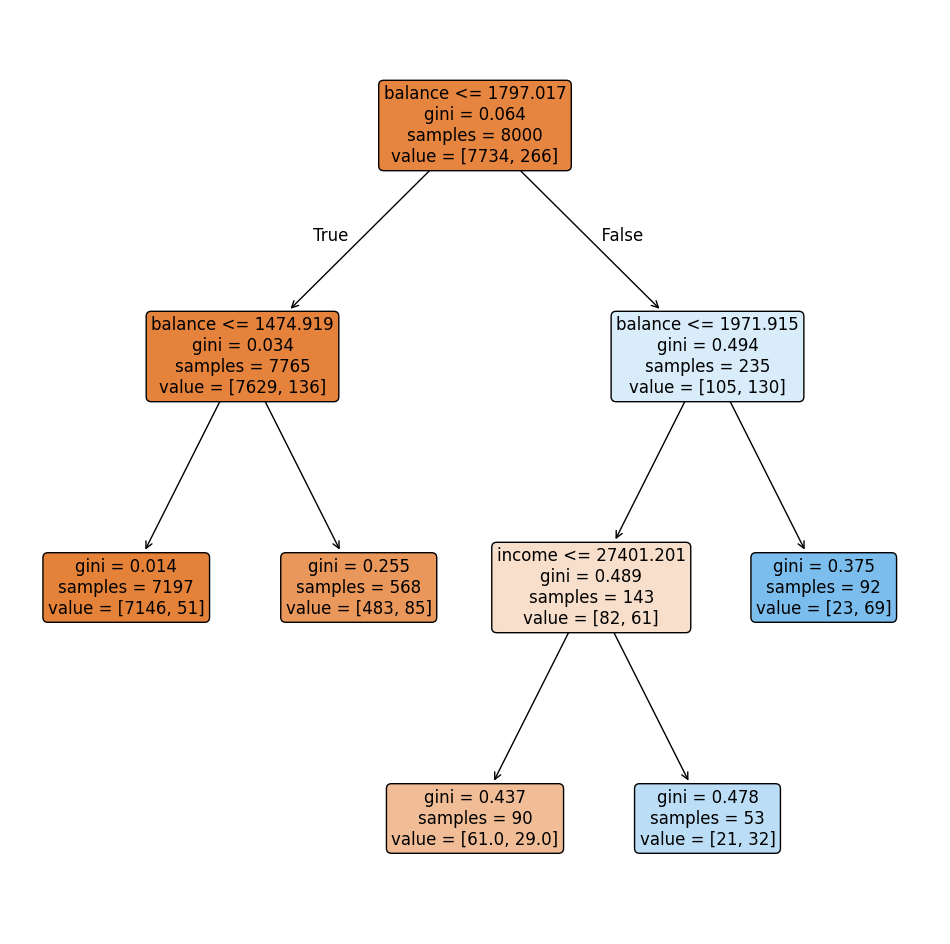

In [ ]:
# Plot the pruned decision tree
plt.figure(figsize=(12, 12))  # Set figure size
tree.plot_tree(
    tree_default_postpruned,
    filled=True,  # Fill nodes with color
    rounded=True,  # Round node edges
    feature_names=X_train_def.columns,  # Label nodes with feature names
    fontsize=12  # Set font size for readability
)
plt.show()  # Display the tree


📌 **Why do we do this?**  
- Displays the **simplified tree structure** after pruning.  
- Nodes with **less importance** are removed.  

✅ **Real-Life Example:**  
Think of **pruning a bonsai tree**:  
- **Trimming unnecessary branches** makes it **look better and grow healthier**.

---

### 📌 **Making Predictions with the Pruned Tree**

In [ ]:
# Predict labels for the test set using the pruned tree
y_pred_post_pr_tree_def = tree_default_postpruned.predict(X_test_def)

📌 **Why do we do this?**  
- Uses the **pruned decision tree** to **predict outcomes** on test data.  

✅ **Real-Life Example:**  
A **simplified decision-making process** is faster and more efficient.  

---


### 📌 **Creating a Confusion Matrix to Evaluate Model Performance**  

In [ ]:
# Generate the confusion matrix to evaluate model performance
confusion_matrix(y_test_def, y_pred_post_pr_tree_def)

array([[1920,   13],
       [  37,   30]])

📌 **Why do we do this?**  
- Evaluates how well the pruned model **classifies default cases**.  

✅ **Real-Life Example:**  
Think of a **medical test**:  
- A good test **correctly identifies sick and healthy patients**.

---


In [ ]:
# Convert the confusion matrix into a DataFrame for better readability
conf_mattrix = pd.DataFrame(
    confusion_matrix(y_test_def, y_pred_post_pr_tree_def),
    index=['Actual_No', 'Actual_Yes'],  # Row labels for actual values
    columns=['Pred_No', 'Pred_Yes']  # Column labels for predicted values
)

# Display the confusion matrix DataFrame
conf_mattrix

,Pred_No,Pred_Yes
Actual_No,1920,13
Actual_Yes,37,30


### 📌 **Generating a Classification Report for Model Evaluation**

In [ ]:
# Print the classification report for detailed evaluation
print(classification_report(y_test_def, y_pred_post_pr_tree_def))

              precision    recall  f1-score   support

          No       0.98      0.99      0.99      1933
         Yes       0.70      0.45      0.55        67

    accuracy                           0.97      2000
   macro avg       0.84      0.72      0.77      2000
weighted avg       0.97      0.97      0.97      2000



📌 **Why do we do this?**  
- Provides key metrics:  
  - **Precision** (How many predicted defaults were actually correct?)  
  - **Recall** (Did we find all actual defaults?)  
  - **F1-score** (Balance between precision and recall)  
  - **Accuracy** (Overall correctness of predictions)  

✅ **Real-Life Example:**  
Think of **grading an exam**:  
- **Accuracy** tells how many answers were correct.  
- **Precision** checks if students got tricky questions right.  
- **Recall** checks if we identified all weak students needing help.  

---

__What are the most important predictors?__

What predictors show up in the tree?

### 📌 **Feature Importance and Model Performance Evaluation**  

Now, we are analyzing **which features contribute the most** to predictions and evaluating the **ROC-AUC score** for the pruned decision tree.

---

### 📌 **Identifying Important Features**  

In [ ]:
# Get the names of features with non-zero importance
X_train_def.columns[tree_default_postpruned.feature_importances_ != 0]

Index(['balance', 'income'], dtype='object')

📌 **Why do we do this?**  
- Extracts **only the features** that the pruned decision tree considers important (i.e., features with nonzero importance).  

✅ **Real-Life Example:**  
Think of **hiring an employee**:  
- Some skills matter more than others. This helps us see **which skills influence the hiring decision**.

---


What is the importance of each predictor?

### 📌 **Creating a Feature Importance DataFrame**  

In [ ]:
# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({
    'Feature': X_train_def.columns,
    'Importance': tree_default_postpruned.feature_importances_
})


📌 **Why do we do this?**  
- Stores **feature importance scores** in a DataFrame.  
- Helps understand which variables contribute the most to predictions.  

✅ **Real-Life Example:**  
A **restaurant ranking system** might value **food quality (70%)** more than **wait time (30%)**.  
- This helps focus on **what really matters**.

---

### 📌 **Sorting Features by Importance**  

In [ ]:
# Sort features by importance in descending order
importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
0,balance,0.968764
1,income,0.031236
2,student_Yes,0.000000


📌 **Why do we do this?**  
- Displays **features in descending order of importance**.  

✅ **Real-Life Example:**  
Think of **prioritizing college courses**:  
- **"Math (High Importance), Gym (Low Importance)"** helps decide where to focus.

---

Obtain the ROC curve and AUC.

### 📌 **Calculating the ROC-AUC Score**  

In [ ]:

# Compute the ROC-AUC score for the pruned decision tree
roc_auc_postpruned = roc_auc_score(y_test_def, tree_default_postpruned.predict_proba(X_test_def)[:, 1])


📌 **Why do we do this?**  
- **ROC-AUC measures the model's ability to distinguish between classes.**  
- The closer **AUC is to 1**, the better the model at separating defaults from non-defaults.  

✅ **Real-Life Example:**  
Think of **a doctor diagnosing a disease**:  
- A **perfect test (AUC=1.0) correctly identifies all sick and healthy patients**.  

---

### 📌 **Rounding and Printing the ROC-AUC Score**

In [ ]:
# Round and print the ROC-AUC score
np.round(roc_auc_postpruned, 3)

0.875

### 📌 **Plotting the ROC Curve**  

In [ ]:
# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, threshold = roc_curve(y_test_def, tree_default_postpruned.predict_proba(X_test_def)[:, 1], pos_label='Yes')


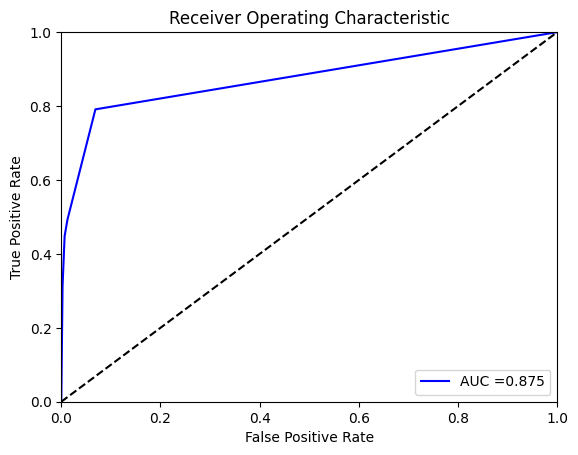

In [ ]:
# Plot the ROC curve
plt.title('Receiver Operating Characteristic')  # Set plot title
plt.plot(fpr, tpr, 'b', label='AUC =' + str(np.round(roc_auc_postpruned, 3)))  # Plot ROC curve with AUC label
plt.legend(loc='lower right')  # Set legend position
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal reference line
plt.xlim([0, 1])  # Set x-axis limits
plt.ylim([0, 1])  # Set y-axis limits
plt.ylabel('True Positive Rate')  # Label y-axis
plt.xlabel('False Positive Rate')  # Label x-axis
plt.show()  # Display the plot


📌 **Why do we do this?**  
- **Visualizes model performance.**  
- The **closer the blue curve is to the top-left**, the better the model.  

✅ **Real-Life Example:**  
Think of a **spam filter**:  
- **High TPR (True Positive Rate)** → Correctly detects spam emails.  
- **Low FPR (False Positive Rate)** → Doesn't wrongly classify important emails as spam.  

---

Compare the performance of NB and the post-pruned tree based on AUC:

NB results:

AUC= 0.951


The NB classifier gives a better balance between sensitivity and specificity across multiple probability thresholds (because it has a higher AUC).

---

___

# Example 2: **Obtaining a classification tree for the Churning dataset**

In [ ]:
# Load the customer churn dataset
url = 'https://raw.githubusercontent.com/Requenamar3/Machine-Learning/refs/heads/main/bank_customer_churn.csv'
churning_df = pd.read_csv(url)

# Display basic dataset information
churning_df.info()  # Check column names, data types, and missing values
churning_df.head()  # Show first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Encoding categorical variables ('Geography' and 'Gender') into dummy variables
# 'drop_first=True' removes the first category to avoid multicollinearity
churning_df_dummies = pd.get_dummies(churning_df, columns=['Geography', 'Gender'], drop_first=True)

In [ ]:
# Displaying information about the dataframe after encoding
churning_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


In [ ]:
# Defining independent variables (X) and dependent variable (y)
x_def_dummies = churning_df_dummies.drop('Exited', axis=1)  # Features (excluding target variable)
y_def_dummies = churning_df_dummies['Exited']  # Target variable (customer churn)

# **Obtain a tree**,
- first by applying pre-pruning and
- then by applying post-pruning.
- Compare the results (i.e., the prediction of both trees on test data).

***Only obtain the feature importance and plot the tree for one tree (the best one between the two trees).***

Continue working independently.

In [ ]:
# Splitting data into training (80%) and testing (20%) sets with stratified sampling
x_train_def_dummies, x_test_def_dummies, y_train_def_dummies, y_test_def_dummies = train_test_split(
    x_def_dummies, y_def_dummies, test_size=0.2, random_state=1, stratify=y_def_dummies
)


In [ ]:
# Defining a hyperparameter grid for tuning a Decision Tree model
hyperparam_grid = {
    'criterion': ['gini', 'entropy'],  # Impurity measures
    'max_depth': np.arange(2, 7),  # Tree depth range
    'min_samples_split': [0.05, 0.1, 0.15, 0.2],  # Minimum samples needed to split a node
    'min_samples_leaf': [0.05, 0.1, 0.15, 0.2],  # Minimum samples per leaf node
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.01, 0.05]  # Minimum decrease in impurity required for split
}

In [ ]:
# Setting up cross-validation with 10 folds
cv_set_up = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
# Running GridSearchCV to find the best hyperparameters for the Decision Tree model
grid_search_setting_pre_pru = GridSearchCV(DecisionTreeClassifier(random_state=1),
                                           param_grid=hyperparam_grid,
                                           cv=cv_set_up,
                                           scoring='accuracy')

In [ ]:
# Training the model with different hyperparameter combinations
grid_search_setting_pre_pru.fit(x_train_def_dummies, y_train_def_dummies)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6]),
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.01,
                                                   0.05],
                         'min_samples_leaf': [0.05, 0.1, 0.15, 0.2],
                         'min_samples_split': [0.05, 0.1, 0.15, 0.2]},
             scoring='accuracy')

In [ ]:
# Printing the best hyperparameter combination found
print('The best hyperparameters are: ', grid_search_setting_pre_pru.best_params_)

The best hyperparameters are:  {'criterion': 'entropy', 'max_depth': 3, 'min_impurity_decrease': 0, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05}


In [ ]:
# Creating a pre-pruned Decision Tree model using the best hyperparameters
churning_df_dummies_prepruned = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, min_samples_split=0.05,
    min_samples_leaf=0.05, min_impurity_decrease=0, random_state=1
)

In [ ]:
# Training the pre-pruned model on the training dataset
churning_df_dummies_prepruned.fit(x_train_def_dummies, y_train_def_dummies)

DecisionTreeClassifier(criterion='entropy', max_depth=3,
                       min_impurity_decrease=0, min_samples_leaf=0.05,
                       min_samples_split=0.05, random_state=1)

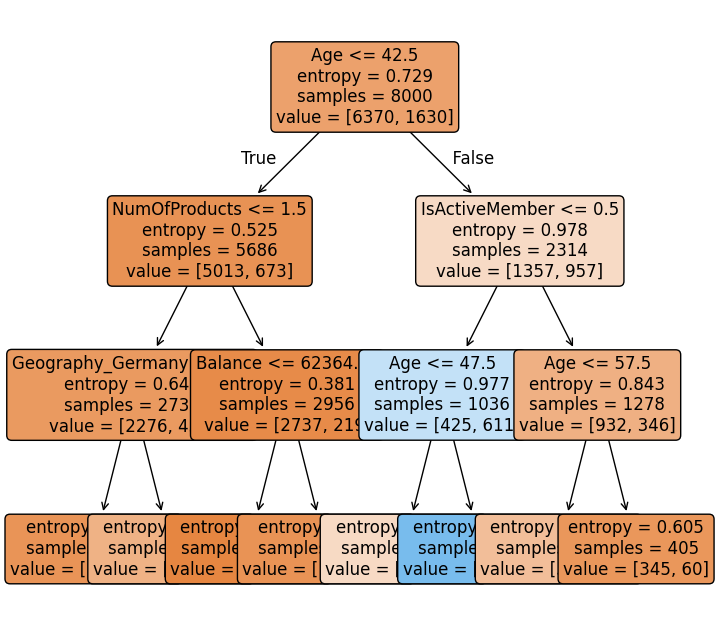

In [ ]:
# Visualizing the decision tree
plt.figure(figsize=(8, 8))
tree.plot_tree(churning_df_dummies_prepruned, filled=True, rounded=True,
               feature_names=x_train_def_dummies.columns, fontsize=12)
plt.show()


In [ ]:
# Displaying class labels used in the pre-pruned decision tree
churning_df_dummies_prepruned.classes_

array([0, 1])

In [ ]:
# Making predictions using the pre-pruned decision tree
y_pred_pre_tree_churn = churning_df_dummies_prepruned.predict(x_test_def_dummies)

In [ ]:
# Generating the confusion matrix to evaluate the model
conf_matrix = confusion_matrix(y_test_def_dummies, y_pred_pre_tree_churn)

In [ ]:
confusion_matrix(y_test_def_dummies, y_pred_pre_tree_churn)

array([[1567,   26],
       [ 307,  100]])

In [ ]:
# Creating a labeled DataFrame for the confusion matrix
df_conf_matrix_churn = pd.DataFrame(conf_matrix,
                                    index=['Actual_No', 'Actual_Yes'],
                                    columns=['Pred_No', 'Pred_Yes'])
df_conf_matrix_churn

,Pred_No,Pred_Yes
Actual_No,1567,26
Actual_Yes,307,100


POST PRUNNING VIA CCP

In [ ]:
# Creating an unpruned Decision Tree model using 'gini' criterion
tree_churn_unpruned = DecisionTreeClassifier(criterion='gini', random_state=1)

# Train the unpruned decision tree
tree_churn_unpruned.fit(x_train_def_dummies, y_train_def_dummies)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Extracting cost complexity pruning path to determine optimal alpha for pruning
ccp_path = tree_churn_unpruned.cost_complexity_pruning_path(x_train_def_dummies, y_train_def_dummies)


In [ ]:
# Defining hyperparameter grid for pruning using 'ccp_alpha'
hyperparam_grid_alpha = {'ccp_alpha': ccp_path.ccp_alphas}

In [ ]:
# Running GridSearchCV to find the best pruning parameter (ccp_alpha)
gridSearch_alpha = GridSearchCV(tree_churn_unpruned,
                                param_grid=hyperparam_grid_alpha,
                                cv=cv_set_up,
                                scoring='accuracy')

In [ ]:
# Training GridSearchCV to determine the best pruning parameter
gridSearch_alpha.fit(x_train_def_dummies, y_train_def_dummies)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'ccp_alpha': array([0.00000000e+00, 7.12328767e-05, 7.29166667e-05, 7.95454545e-05,
       8.13953488e-05, 8.14393939e-05, 8.16993464e-05, 8.18181818e-05,
       8.21596244e-05, 8.22916667e-05, 8.27546296e-05, 8.28082789e-05,
       8.28431373e-05, 8.33333333e-...
       7.24453502e-04, 7.41323529e-04, 8.24662005e-04, 8.58765751e-04,
       8.93891935e-04, 1.00512821e-03, 1.13572801e-03, 1.13838295e-03,
       1.55032375e-03, 1.60839759e-03, 1.79432724e-03, 2.11110001e-03,
       2.14894268e-03, 2.45544092e-03, 2.72326958e-03, 4.06694923e-03,
       4.81435165e-03, 5.34977807e-03, 6.13881497e-03, 7.93970537e-03,
       1.38041179e-02, 1.45592156e-02, 3.58326153e-02])},
             scoring='accuracy')

In [ ]:
# Displaying the best alpha (pruning parameter) found
print('The best parameters are: ', gridSearch_alpha.best_params_)

The best parameters are:  {'ccp_alpha': 0.0005453774401698915}


In [ ]:
# Creating a post-pruned Decision Tree model using the best 'ccp_alpha'
tree_churn_postpruned = DecisionTreeClassifier(random_state=1,
                                               ccp_alpha=gridSearch_alpha.best_params_['ccp_alpha'])


In [ ]:
# Training the post-pruned decision tree model
tree_churn_postpruned.fit(x_train_def_dummies, y_train_def_dummies)

DecisionTreeClassifier(ccp_alpha=0.0005453774401698915, random_state=1)

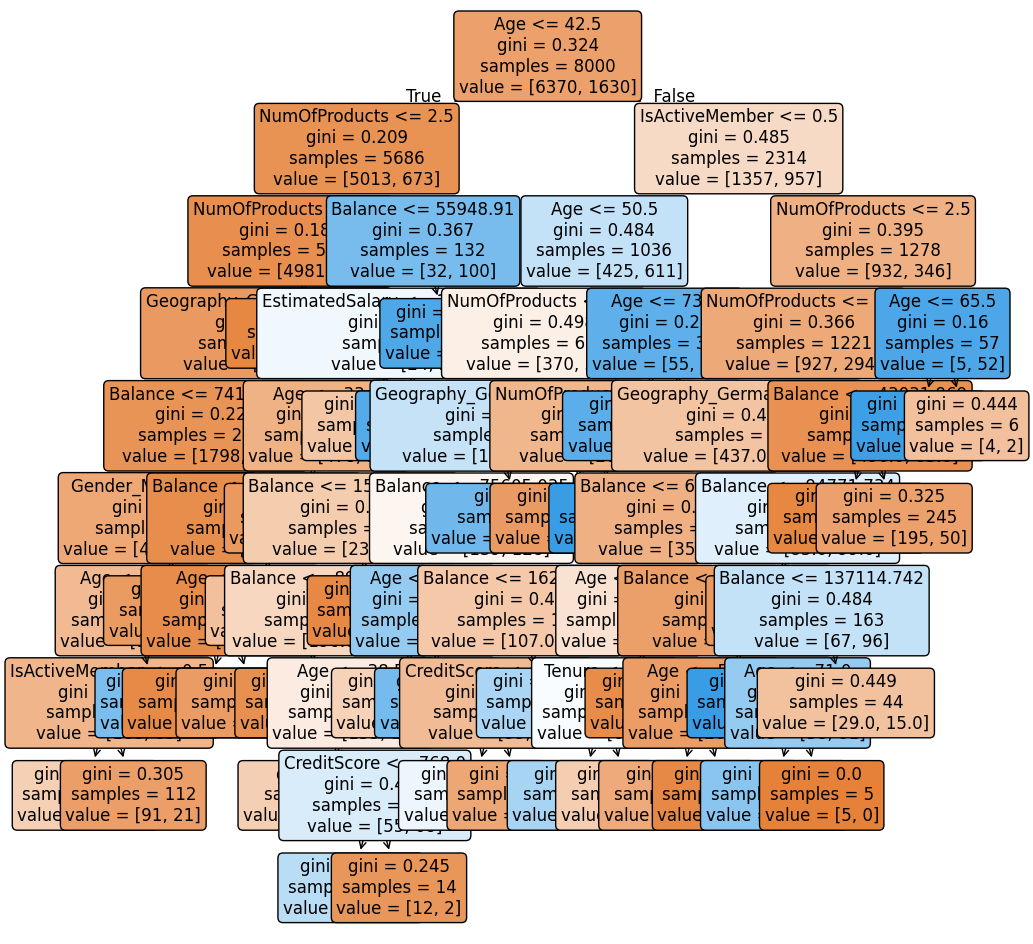

In [ ]:
# Visualizing the post-pruned decision tree
plt.figure(figsize=(12,12))
tree.plot_tree(tree_churn_postpruned, filled=True, rounded=True,
               feature_names=x_train_def_dummies.columns, fontsize=12)
plt.show()

In [ ]:
# Making predictions using the post-pruned decision tree
y_pred_post_pr_tree_churn = tree_churn_postpruned.predict(x_test_def_dummies)

In [ ]:
# Generating confusion matrix for post-pruned model evaluation
conf_matrix_post_pruned = confusion_matrix(y_test_def_dummies, y_pred_post_pr_tree_churn)

In [ ]:
# Displaying classification report to analyze performance metrics
print(classification_report(y_test_def_dummies, y_pred_post_pr_tree_churn))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.72      0.48      0.58       407

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
# Extracting important features used in the post-pruned tree
important_features = x_def_dummies.columns[tree_churn_postpruned.feature_importances_ != 0]

In [ ]:
# Creating a DataFrame to store feature importance values
importance_df = pd.DataFrame({'Feature': x_def_dummies.columns,
                              'Importance': tree_churn_postpruned.feature_importances_})


In [ ]:
# Sorting features by importance in descending order
importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
1,Age,0.397077
4,NumOfProducts,0.301187
6,IsActiveMember,0.116876
3,Balance,0.102969
8,Geography_Germany,0.056607
0,CreditScore,0.010001
7,EstimatedSalary,0.005727
10,Gender_Male,0.005255
2,Tenure,0.004302
5,HasCrCard,0.000000
